<b>¡Hola Rocio!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Proyecto pronosticos y predicciones

> La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes, con esta informacion podremos identificar los clientes que comienzan a abandonar sus contratos quienes son un posible pronostico de cancelacion, lo que nos permitira ofrecer promociones o incentivos para que sigan asistiendo a Model Fitness. Y mejorar nuestras predicciones de retencion de clientes.

### Visualizacion y limpieza de datos

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
model_fitness = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
model_fitness.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
model_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
print(f'Cantidad de filas duplicadas: {model_fitness.duplicated().sum()}')

Cantidad de filas duplicadas: 0


In [6]:
def standard_columns(df):
    "Optimiza encabezados de columnas eliminando mayusculas"
    df.columns = df.columns.str.lower()
    return df 

df = standard_columns(model_fitness)

In [7]:
# comprobar que no existen valores nulos 
print(df.isnull().sum())

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


In [8]:
# verificar los valores unicos de las variables 
print(df.nunique())

gender                                  2
near_location                           2
partner                                 2
promo_friends                           2
phone                                   2
contract_period                         3
group_visits                            2
age                                    23
avg_additional_charges_total         4000
month_to_end_contract                  12
lifetime                               29
avg_class_frequency_total            3913
avg_class_frequency_current_month    3820
churn                                   2
dtype: int64


<div class="alert alert-block alert-success">
<b>Celdas [1–8]</b> <a class="tocSkip"></a><br>
Excelente inicio, Rocío. Tu enfoque en limpieza y estandarización de los datos fue muy ordenado: verificaste duplicados, valores nulos y diste formato uniforme a las columnas. También agregaste una validación de unicidad útil para identificar columnas de alta cardinalidad. Esta sección muestra que manejas con soltura los fundamentos del preprocesamiento, lo cual es clave en ciencia de datos.
</div>


### Análisis exploratorio de datos (EDA)

####  Observacion de los valores promedio y la desviación estándar a traves del método describe().

In [9]:
model_fitness.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observaciones:

* No existen datos nulos, duplicados o que requieran ser transformados a otro tipo de datos.

A traves del describe de nuestro data frame podemos ver que: 
* La columna gender nos muestra que existe en promedio la misma cantidad de hombres y mujeres inscritos
* Near location indica que la mayoria de los clientes vive cerca al gimnasio 
* Partner que en promedio menos de la mitad de los clientes pertenecen a algun convenio al igual que el convenio de Promo friends
* La columna phone nos indica que tenemos el numero telefonico de la mayoria de los clientes
* Contract period nos muestra que en promedio los clientes contratan plan de 3 o 6 meses.
* La edad promedio de los asistentes es de 29 anos 
* Lifetime muestra que los clientes se quedan aproximadamente 4 meses en el gimnasio
* Finalmente podemos ver que los clientes asisten al gimnasio aproximadamente dos veces por semana.

#### Observacion de los valores medios de las características divididas en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron utilizando groupby().

In [10]:
# contar cuantas cancelaron y cuantas se quedaron

churn_count = model_fitness.groupby(['churn']).count()
churn_count

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


In [11]:
# crear variables de personas que cancelaron y no cancelaron

churned = model_fitness[model_fitness['churn']==0]
not_churned = model_fitness[model_fitness['churn']==1]

In [12]:
# promedio de los datos de personas que cancelaron

churned.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882


In [13]:
# promedio de los datos de personas que no cancelaron

not_churned.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

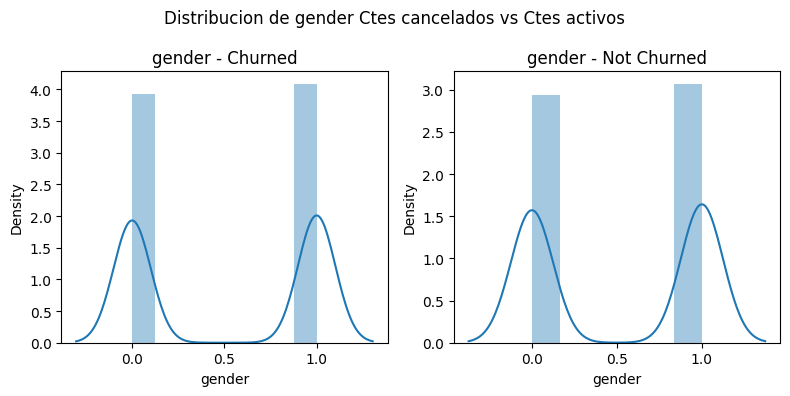

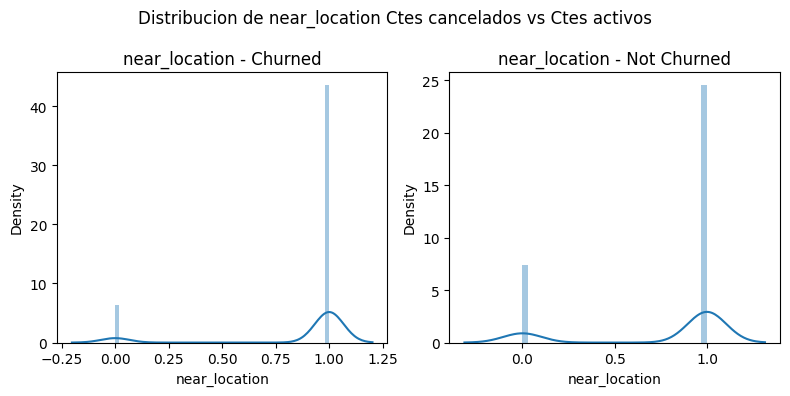

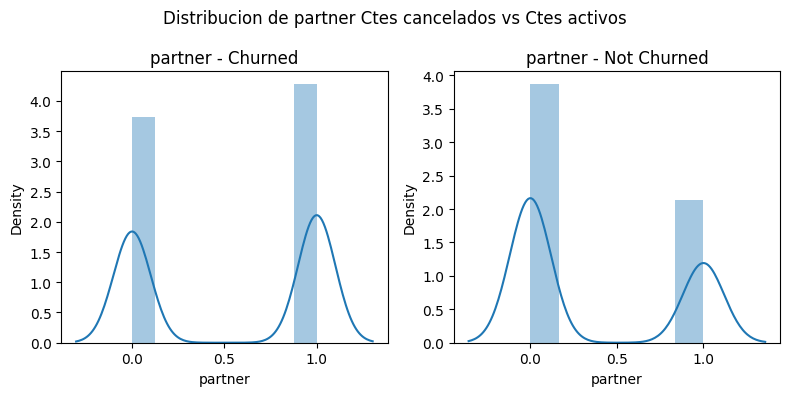

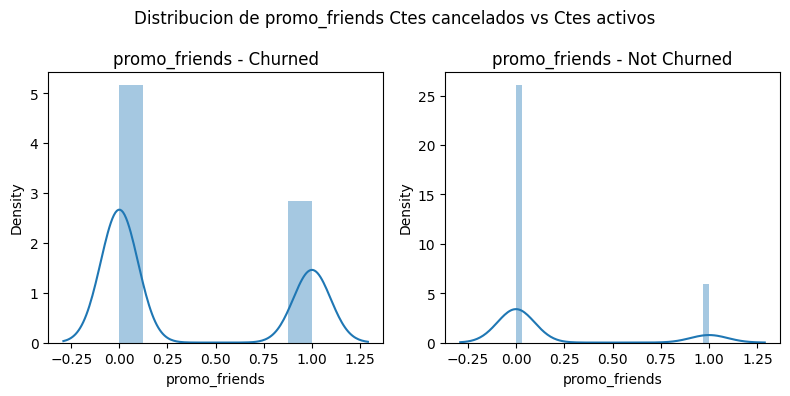

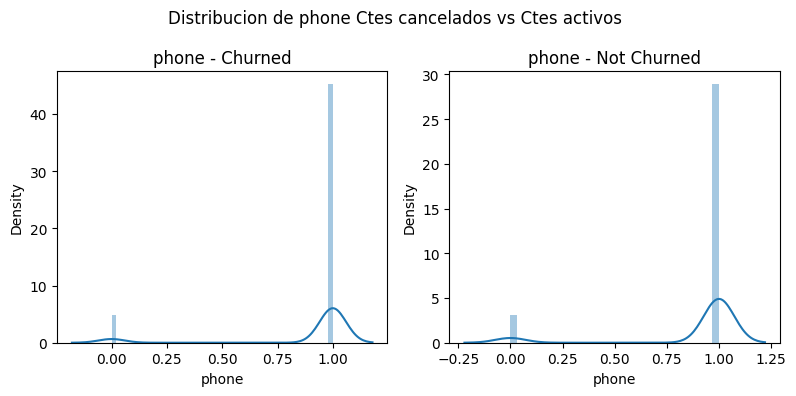

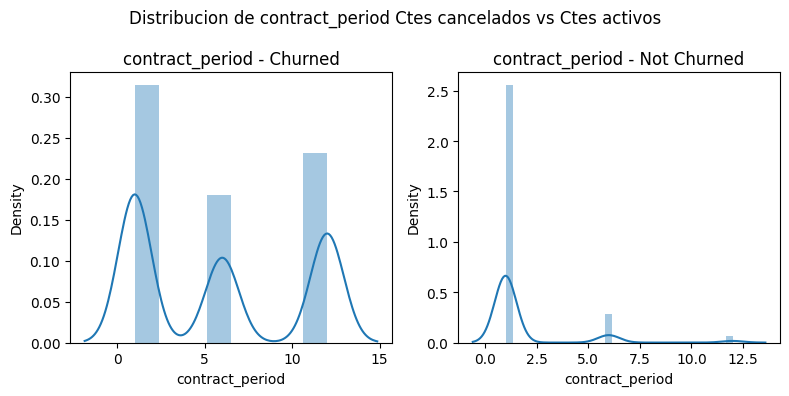

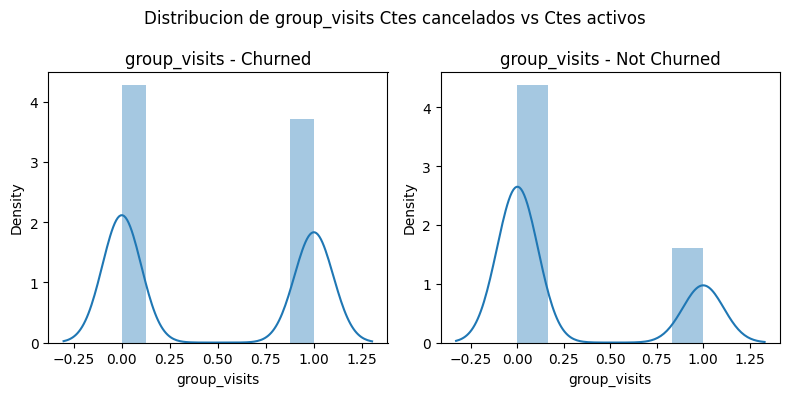

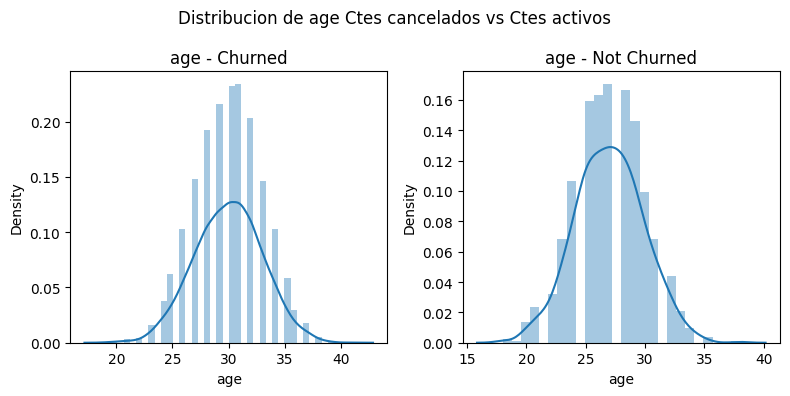

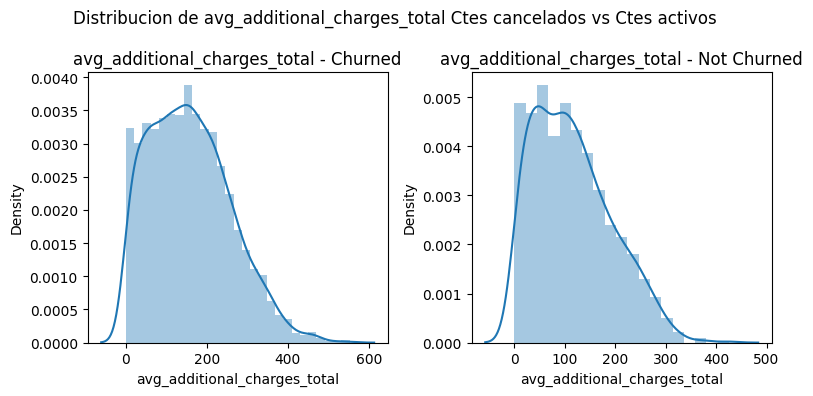

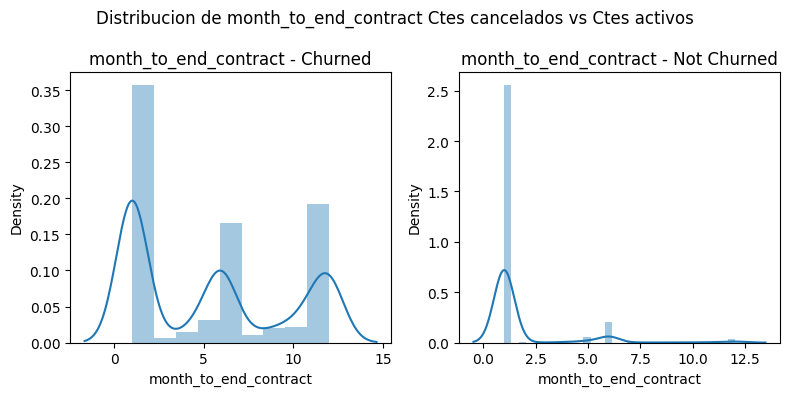

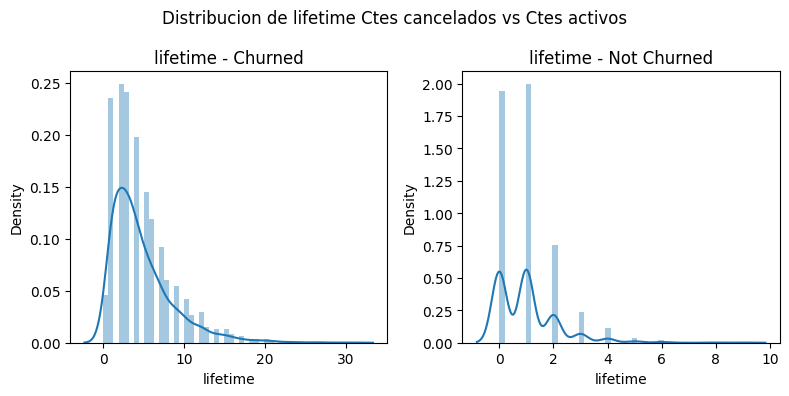

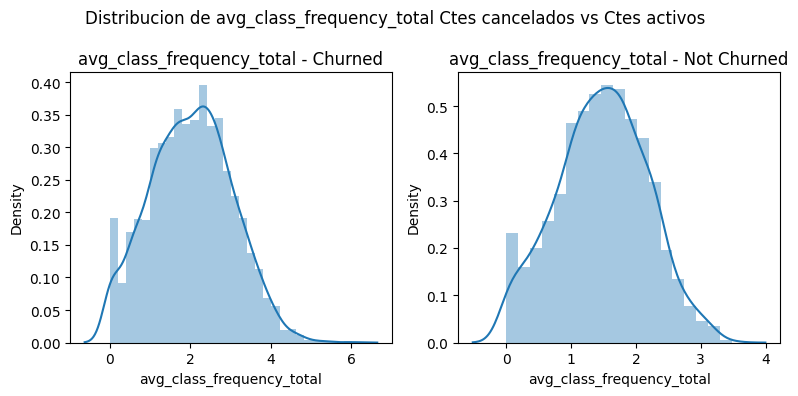

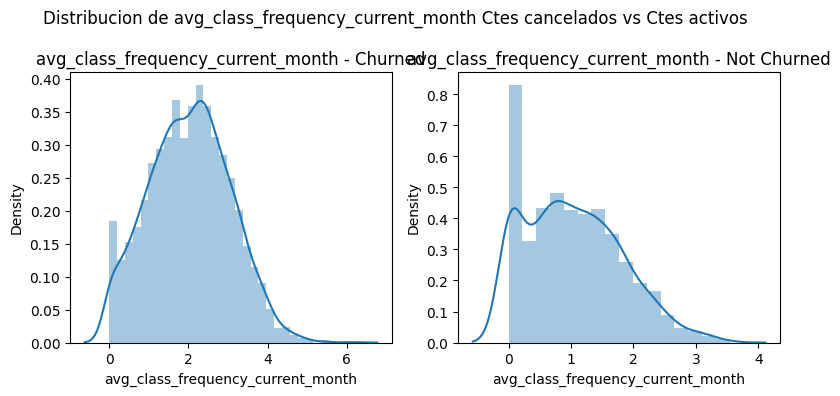

In [14]:
# Crear una lista de las columnas (excepto 'churn' porque no queremos graficar esa columna)
columns = [col for col in churned.columns if col != 'churn']

# Crear los gráficos para cada columna
for col in columns:
    # Crear una figura con 1 fila y 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.suptitle(f'Distribucion de {col} Ctes cancelados vs Ctes activos')

    # Gráfico 1: Histograma de la columna en 'churned'
    sns.distplot(churned[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} - Churned')

    # Gráfico 2: Histograma de la misma columna en 'not_churned'
    sns.distplot(not_churned[col], kde=True, ax=axes[1])
    axes[1].set_title(f'{col} - Not Churned')

    # Ajustar y mostrar los gráficos
    plt.tight_layout()
    plt.show()

Observaciones

Al analizar la distribución de las variables para clientes que cancelaron y los que continuaron activos, se observan los siguientes patrones:

Lifetime: A diferencia de lo que podría suponerse, los clientes que cancelan tienden a tener un lifetime mayor que los que siguen activos. Es decir, muchas personas que se han dado de baja llevaban varios meses como miembros del gimnasio, mientras que los clientes actuales suelen tener una membresía más reciente, podemos entrar en el cuestionamiento de que lleva a que los miembros del gimnasio con un lifetime extenso, terminen cancelando su membresia. 

Avg_class_frequency_current_month: Esta variable muestra una diferencia clara entre los dos grupos. Los clientes que ya cancelaron estaban en un buen ritmo de asistencia justo antes de cancelar, lo cual podría reflejar un intento final de “recuperar” su inversión antes de irse, o simplemente que no basta con ir al gimnasio frecuentemente si no se sienten satisfechos con otros aspectos (precio, ambiente, resultados esperados, etc.).En cambio, muchos de los clientes activos parecen estar asistiendo muy poco recientemente, lo cual puede ser una alerta temprana de posible deserción futura. Volvemos al cuestionamiento de que lleva que los clientes con "tan buen ritmo" terminen cancelando.

Group_visits: se puede apreciar nuevamente que en grupo de personas que cancelan participan mas en clases grupales que el grupo de personas que no cancelan, esto lo podriamos relacionar con clientes que quizas no tienen tiempo para asistir a las clases y relacionan su compromiso con el gimnasio con las clases grupales y al no poder asistir cancelan su suscripcion. 

Contract_period y Month_to_end_contract: Como podemos ver, las personas que se poseem contratos de un mes son los que aun estan activos, lo que se puede inferir que los usuarios que aun se encuentran activos (not-churned) es porque simplemente no han terminado sus contratos

Promo_friends y Partner: Los clientes que ingresaron a través de promociones o empresas asociadas parecen tener un leve menor nivel de cancelación, pero no es una diferencia tan marcada como en otras variables.

#### Matriz de correlacion 

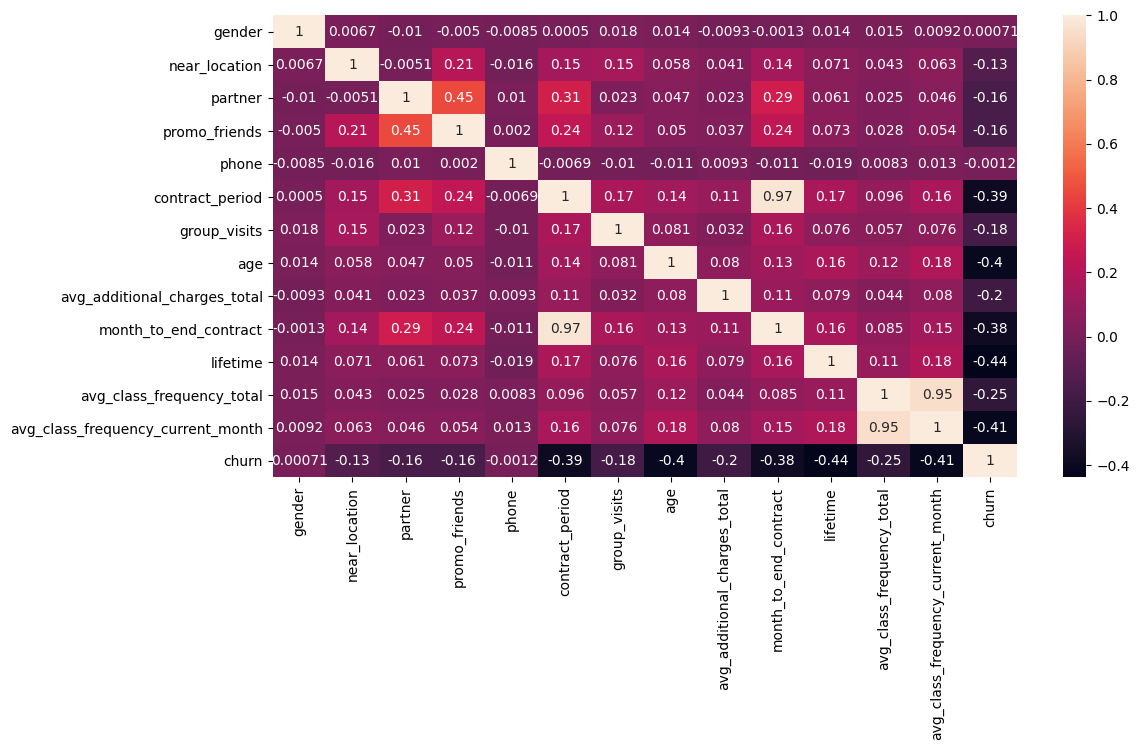

In [15]:
corr_model_fitness = model_fitness.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_model_fitness, annot=True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [9–15]</b> <a class="tocSkip"></a><br>
Tu análisis exploratorio (EDA) es especialmente sólido. Combinaste estadísticas agregadas con visualizaciones y descripciones profundas para entender el comportamiento de usuarios que cancelan vs. los que permanecen. Además, lograste interpretar patrones no triviales (como la alta asistencia justo antes de cancelar), lo que aporta mucho valor al análisis. El uso de histogramas con <code>distplot</code> por grupo de churn fue acertado, aunque en versiones recientes de Seaborn se recomienda usar <code>histplot</code>.
</div>


Observaciones

Principales correlaciones con respecto a churn:

lifetime y churn:
Correlación negativa (~-0.44) A mayor tiempo que una persona lleva en el gimnasio, menos probable es que cancele. Tiene sentido, de todas formas en los graficos mostraban senales de cancelacion.

contract_period y churn:
Correlación negativa (~-0.39) Los contratos más largos disminuyen la probabilidad de cancelación. 

month_to_end_contract y churn:
Correlación negativa (~-0.38) Mientras más meses le quedan al contrato, menos probable es que cancele ahora.

avg_class_frequency_current_month y churn:
Correlación negativa (~-0.41) Cuanto más activo ha sido el cliente en el último mes, menos chances de cancelación.

group_visits y churn:
Correlación negativa (~-0.18) Participar en clases grupales también disminuye la posibilidad de cancelación, posiblemente por motivos sociales o motivacionales.

Otras correlaciones

avg_class_frequency_current_month y avg_class_frequency_total:
Alta correlación positiva (~0.95) Tiene sentidoya que quien suele ir al gimnasio con frecuencia, también lo hace actualmente.

contract_period, month_to_end_contract y lifetime:
Correlaciones positivas entre sí. Los contratos más largos están ligados a más meses de antigüedad y más meses restantes.

### Construir un modelo para predecir la cancelación de usuarios

In [16]:
# definir variables

X = model_fitness.drop(columns=['churn'])
y = model_fitness['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [17]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions_prob = model.predict_proba(X_test)
predictions = model.predict(X_test)

print()
print('Resultados del modelo logistico:')
print()
print('La exactitud del modelo es: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('La precision del modelo es: {:.2f}'.format(precision_score(y_test, predictions)))
print('La recuperacion del modelo es: {:.2f}'.format(recall_score(y_test, predictions)))


Resultados del modelo logistico:

La exactitud del modelo es: 0.92
La precision del modelo es: 0.87
La recuperacion del modelo es: 0.81


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-block alert-warning">
<b>Celdas [16–17]</b> <a class="tocSkip"></a><br>
Aunque el modelo de regresión logística alcanza buenos resultados, aparece una advertencia de convergencia (<code>ConvergenceWarning</code>). Esto sugiere que el optimizador <code>lbfgs</code> no llegó a una solución óptima en el número de iteraciones por defecto. Para mayor robustez, te recomiendo ajustar el hiperparámetro <code>max_iter</code> (por ejemplo, 1000) o escalar explícitamente tus datos antes de entrenar el modelo. Esto evitaría que el entrenamiento quede incompleto.
</div>


Observaciones: 

La regresión logística está funcionando bastante bien.
Tiene una buena precisión, lo que significa que la mayoría de los usuarios que predice como cancelados realmente lo son.
También tiene un buen recall, lo que indica que el modelo detecta bien a los clientes que realmente cancelan.

In [18]:
for n_tree in range(10, 120, 20):
    model_forest =  RandomForestClassifier(n_estimators=n_tree, max_depth=20)
    model_forest.fit(X_train, y_train)
    predictions_forest = model_forest.predict(X_test)
    print()
    print(f'Resultados del modelo Random Forest de {n_tree}:')
    print('La exactitud del modelo es: {:.2f}'.format(accuracy_score(y_test, predictions_forest)))
    print('La precision del modelo es: {:.2f}'.format(precision_score(y_test, predictions_forest)))
    print('La recuperacion del modelo es: {:.2f}'.format(recall_score(y_test, predictions_forest)))




Resultados del modelo Random Forest de 10:
La exactitud del modelo es: 0.90
La precision del modelo es: 0.84
La recuperacion del modelo es: 0.74

Resultados del modelo Random Forest de 30:
La exactitud del modelo es: 0.92
La precision del modelo es: 0.85
La recuperacion del modelo es: 0.80

Resultados del modelo Random Forest de 50:
La exactitud del modelo es: 0.91
La precision del modelo es: 0.84
La recuperacion del modelo es: 0.81

Resultados del modelo Random Forest de 70:
La exactitud del modelo es: 0.91
La precision del modelo es: 0.84
La recuperacion del modelo es: 0.79

Resultados del modelo Random Forest de 90:
La exactitud del modelo es: 0.92
La precision del modelo es: 0.84
La recuperacion del modelo es: 0.82

Resultados del modelo Random Forest de 110:
La exactitud del modelo es: 0.92
La precision del modelo es: 0.85
La recuperacion del modelo es: 0.82


<div class="alert alert-block alert-success">
<b>Celdas [18]</b> <a class="tocSkip"></a><br>
Muy bien planteado el análisis con Random Forest. Probaste diferentes cantidades de árboles y comparaste sus métricas clave de forma clara. Me parece especialmente acertado que observaras el punto de estabilización del rendimiento a partir de cierto número de árboles. Es una práctica de validación excelente para seleccionar hiperparámetros sin necesidad de un grid completo.
</div>


Observaciones:

A partir de 30 árboles, el rendimiento se estabiliza, el mejor resultado es con 110 arboles y se ve que tiene un comportamiento levemente mejor que la regresion logistica. 

### Creacion de clústeres de usuarios

#### Estandarizacion de los datos.

In [19]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#### Utilizando la función linkage() se crea una matriz de distancias basada en la matriz de características estandarizada y se traza un dendrograma. 

In [20]:
linked = linkage(X_train_st, method='ward')

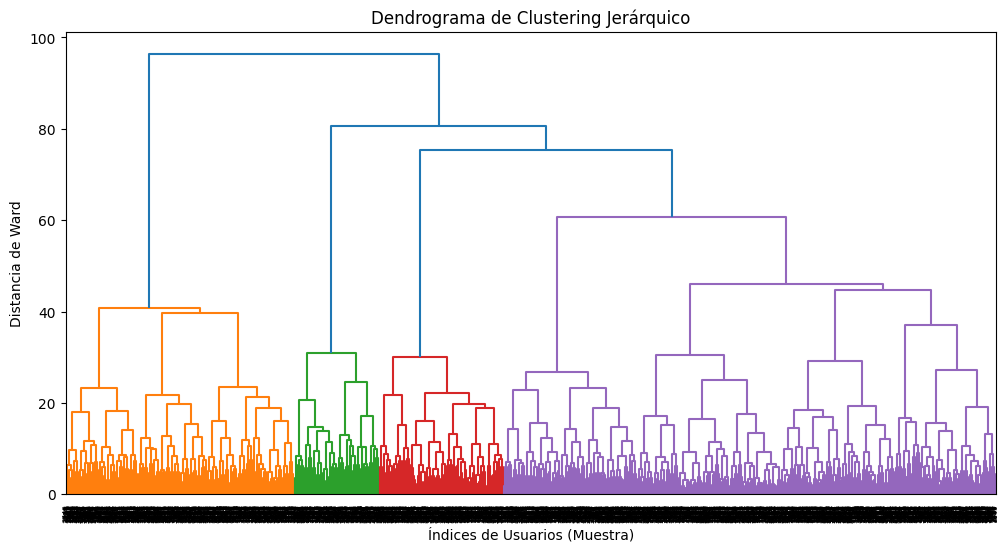

In [21]:
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level')
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Usuarios (Muestra)")
plt.ylabel("Distancia de Ward")
plt.show()

#### Entrenamiento del modelo de clustering con el algortimo K-means y prediccion de los clústeres de clientes. 

In [22]:
# Aplicar K-Means con 5 clústeres
km = KMeans(n_clusters=5, n_init=10, random_state=0)
labels = km.fit_predict(X_train_st)

# Agregar las etiquetas de clúster a los datos originales
model_fitness.loc[X_train.index, 'cluster'] = labels
model_fitness.loc[X_test.index, 'cluster'] = km.predict(X_test_st)

# Ver los primeros resultados
print(model_fitness[['cluster']].value_counts())

cluster
2.0        1227
0.0         997
3.0         878
1.0         512
4.0         386
dtype: int64


#### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [23]:
# representacion de los cluster 

cluster_profiles = model_fitness.groupby('cluster').mean()
cluster_profiles[['churn', 'age', 'contract_period', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']]

,churn,age,contract_period,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total
cluster,,,,,,,
0.0,0.028084,29.990973,10.946841,4.758275,1.978397,1.970874,161.164872
1.0,0.437500,28.505859,2.417969,2.814453,1.678321,1.498679,135.341642
2.0,0.524042,28.116544,1.967400,2.374083,1.230751,0.990416,130.293014
3.0,0.071754,30.105923,2.636674,4.874715,2.800069,2.796390,162.032720
4.0,0.266839,29.297927,4.777202,3.940415,1.854211,1.723967,144.208179


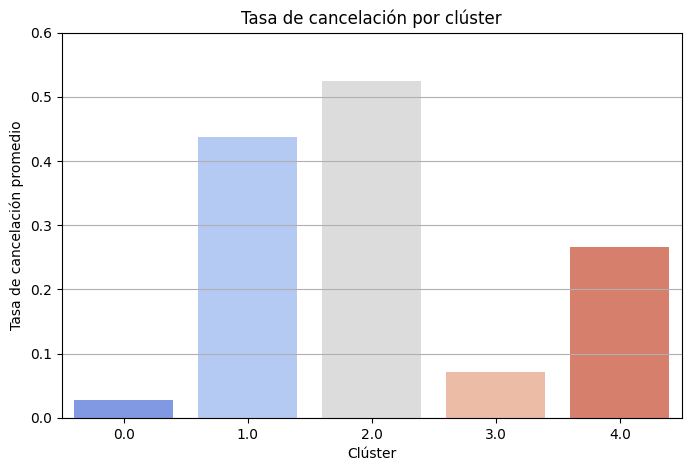

In [24]:
# grafica de perfiles de cluster

cancel_rate = model_fitness.groupby('cluster')['churn'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='coolwarm')
plt.title('Tasa de cancelación por clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de cancelación promedio')
plt.ylim(0, 0.6)
plt.grid(axis='y')
plt.show()

Observaciones:

Clúster 0 – Los mas fieles
Churn más bajo (2.8%)
Planes largos (casi 11 meses)
Alta asistencia (casi 2 veces/semana)
Buenos ingresos por cargos adicionales
Clientes leales y comprometidos. Posiblemente clientes antiguos o con buen onboarding.

Clúster 1 – En riesgo
Churn alto (43%)
Contratos cortos (2.4 meses)
Baja frecuencia
Posible falta de enganche o motivación inicial.

Clúster 2 – Riesgo máximo
Churn altísimo (52%)
Contratos más cortos (1.97 meses)
Asistencia muy baja (1.2 x semana y 0.99 este mes)
Poca duración (~2.3 meses)
Necesitan intervención urgente aöguna campañas y seguimiento).

Clúster 3 – Activos pero con contrato corto
Churn bajo (7.2%)
Contratos cortos (2.6 meses) 
Alta frecuencia (2.8/semana) y buen lifetime (~4.8)
Muy activos y valiosos, aunque con contrato corto. 
Tal vez se quedan renovando constantemente (quizas existen ofertas por contratos cortos)

Clúster 4 – Intermedios
Churn moderado (26%)
Frecuencia aceptable
Planes medianos (4.8 meses)
Cargos decentes
Grupo mixto, ni muy leales ni tan propensos a irse.

#### Grafico de distribuciones de características para los clústeres. 

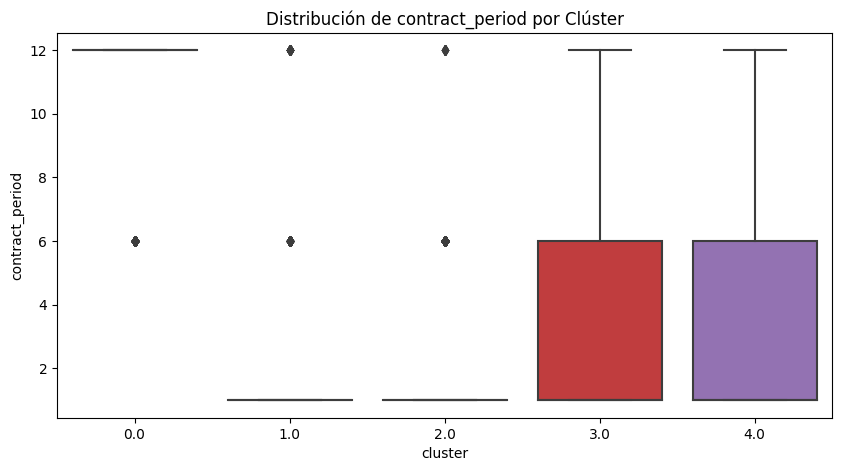

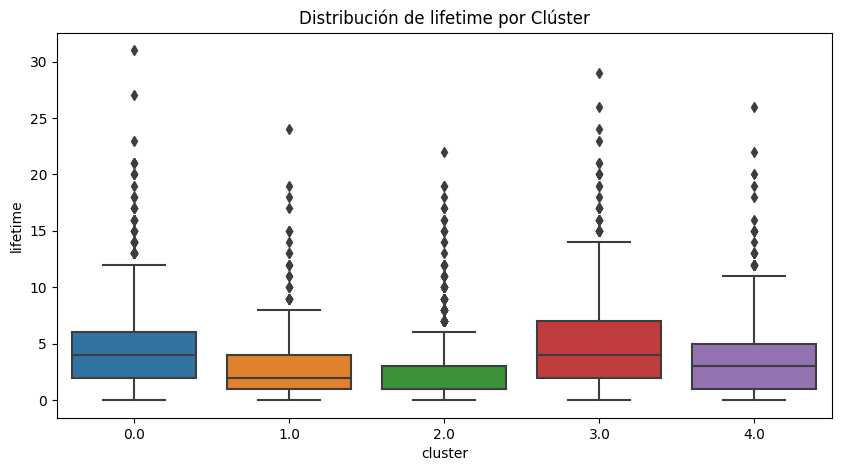

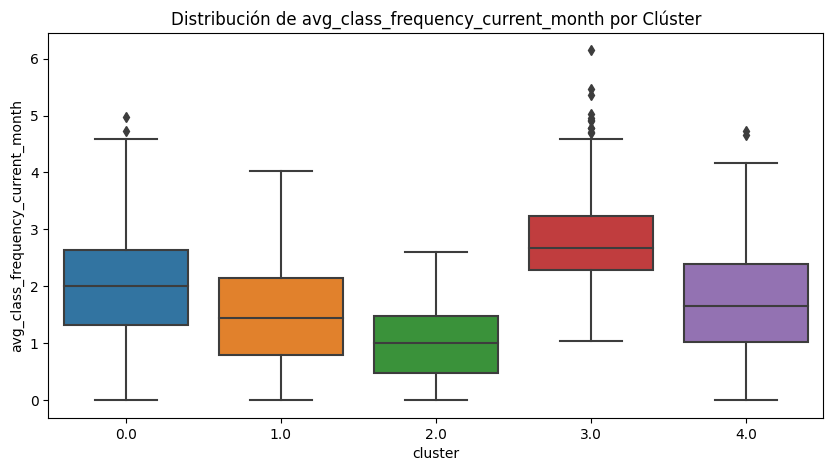

In [25]:
# Características que te interesa analizar
features = ['contract_period', 'lifetime', 
            'avg_class_frequency_current_month']

# Graficamos por cada feature
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster', y=feature, data=model_fitness)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [19–25]</b> <a class="tocSkip"></a><br>
El bloque de clustering es uno de los más valiosos del proyecto. Aplicaste correctamente <code>StandardScaler</code>, exploraste la estructura jerárquica con un dendrograma y elegiste bien el número de clústeres para <code>KMeans</code>. La forma en que luego enriqueces los datos con los perfiles promedio por clúster y cruzas esto con churn es excelente. Las visualizaciones de <code>boxplot</code> permiten detectar clústeres de alto riesgo con claridad, y tus interpretaciones estratégicas están bien fundamentadas. Este análisis aporta verdadero valor para la toma de decisiones.
</div>


Observaciones:

Grafico de distribucion de contract_period:
Clúster 2 es el que tiene contratos más largos (hasta 12 meses), y tiene la tasa de cancelación más alta, quizás indica que no están satisfechos o no usan el servicio.
Clúster 0, que tiene contratos de 6 meses y baja tasa de cancelacion, podría representar usuarios leales y comprometidos, que mantienen su rutina.
Clúster 3, con planes más cortos pero baja tasa de cancelación, quizá representa usuarios que van más seguido o se comprometen a corto plazo pero con constancia.

Grafico de distribucion de lifetime:
Clúster 2 es el de mayor riesgo: contratos largos, poco uso, y se van rápido.
Clúster 3 es el más leal: aunque eligen contratos cortos, tienen alta permanencia y baja cancelación.
Clúster 0 también es fuerte: buena permanencia, contratos medianos, y se quedan.
Clústeres 1 y 4 son intermedios y podrían requerir estrategias de fidelización.

Grafico de distribucion de avg_class_frequency_current_month:
A mayor frecuencia reciente, menor probabilidad de cancelación.
Este gráfico muestra la importancia de la constancia y del uso regular del servicio como predictor de fidelidad.
Clúster 2 y 1 son los más pasivos y, por ende, los más propensos a irse.
Clúster 3 es el más fuerte: usuarios activos, comprometidos y fieles.



#### Calculo de la tasa de cancelación para cada clúster. ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [36]:
# Tasa de cancelación por clúster
cancel_rate_by_cluster = model_fitness.groupby('cluster')['churn'].mean().sort_values(ascending=False)*100


In [43]:
for cluster, rate in cancel_rate_by_cluster.items():
    if rate < 10:
        risk_level = 'Riesgo bajo'
    elif 10 <= rate <= 30:
        risk_level = 'Riesgo medio'
    else:
        risk_level = 'Riesgo alto'
    
    print(f'Tasa de cancelación del clúster {cluster}: {rate:.2f}% - {risk_level}')

Tasa de cancelación del clúster 2.0: 52.40% - Riesgo alto
Tasa de cancelación del clúster 1.0: 43.75% - Riesgo alto
Tasa de cancelación del clúster 4.0: 26.68% - Riesgo medio
Tasa de cancelación del clúster 3.0: 7.18% - Riesgo bajo
Tasa de cancelación del clúster 0.0: 2.81% - Riesgo bajo


Observaciones: 

Como vimos en los ejercicios anteriores y podemos concluir finalmente son los cluster 0 y 3 los mas fieles y de menor riesgo, para luego ver el cluster 4 que posee un riesgo medio, seria importante en este paso prevenir que pase a ser un cluster de riesgo, creando campanas de ofertas para incentivar la permanencia en el gimnasio y finalmente tenemos el cluster 1 y 2 los cuales poseen un alto riesgo de cancelacion y es importante activar campanas, ofertas de forma rapida para evitar la cancelacion, quizas tambie se podrian implementar encuestas para todos los cluster para descubrir que es lo que les incentiva a quedar o irse. 

### Conclusiones y recomendaciones básicas sobre el trabajo con clientes

Recomendaciones:

*Focalizar esfuerzos de retención en clientes de alto riesgo:*

Acción: Crear campañas personalizadas de retención dirigidas a los clientes con tasas de cancelación altas (clústeres 2.0 y 1.0). Esto puede incluir descuentos exclusivos, promociones o beneficios adicionales.

Ejemplo: Ofrecer un descuento en su próxima renovación de membresía o acceso a clases exclusivas si renuevan antes de una fecha determinada.

*Fortalecer la fidelidad de los clientes más leales:*

Acción: Aumentar el valor para los clientes más leales (clústeres 0.0 y 3.0) a través de programas de recompensas o beneficios exclusivos para que se sientan apreciados y sigan siendo clientes a largo plazo.

Ejemplo: Ofrecer acceso a eventos VIP o clases de entrenamiento personalizadas para premiar su fidelidad y motivarlos a seguir usando el servicio.


*Intervenciones tempranas para clientes en riesgo medio:*

Acción: Implementar estrategias de intervención para los clientes en riesgo medio (clúster 4.0), como seguimiento personalizado o encuestas de satisfacción para entender mejor sus necesidades y evitar que pasen a la categoría de "riesgo alto".

Ejemplo: Enviar un correo electrónico personalizado que ofrezca un análisis gratuito de sus entrenamientos o sugerencias de cómo aprovechar mejor las instalaciones del gimnasio.



**Monitoreo constante y ajuste de la estrategia:

Acción: Establecer un proceso continuo de monitoreo y análisis de la tasa de cancelación de clientes para poder ajustar rápidamente las estrategias y asegurarse de que las intervenciones sean efectivas.

Ejemplo: Utilizar análisis de comportamiento de los clientes, como la frecuencia de uso o la interacción con el gimnasio, para predecir posibles cancelaciones y actuar proactivamente.

Resumen:
Atención personalizada a clientes con alta tasa de cancelación.

Recompensas y beneficios exclusivos para clientes fieles.

Intervenciones tempranas para clientes en riesgo medio.

Monitoreo constante para ajustar la estrategia según sea necesario.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Excelente trabajo, Rocío! Este proyecto destaca por su estructura clara, profundidad analítica y el equilibrio entre técnicas predictivas y segmentación de clientes. Supiste combinar modelos supervisados con clustering, lo que enriquece el diagnóstico de cancelación. Tus visualizaciones, interpretaciones y recomendaciones estratégicas están muy bien fundamentadas.  ¡Felicitaciones por un análisis completo y profesional!
</div>
